<a href="https://colab.research.google.com/github/Darsangmdd/Diamond-Price-Prediction-/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***DIAMOND PRICE PREDICTION USING REGRESSION MODELS***

Link to the dataset : https://www.kaggle.com/ritikmaheshwari/diamond-price-prediction

In [204]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
dataset = pd.read_csv('diamonds_data.csv')
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [205]:
dataset.shape

(53940, 10)

In [206]:
dataset['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

**CONVERTING CATEGORICAL VARIABLES INTO ORDINAL VARIABLES**

In [207]:
dataset['cut'] = dataset['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Ideal':3,'Premium':4})

In [208]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,3,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,3,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [209]:
dataset['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [210]:
dataset['clarity'] = dataset['clarity'].replace({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})

In [211]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,3,E,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,3,D,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,D,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,H,1,61.0,58.0,2757,6.15,6.12,3.74


In [212]:
dataset['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

**PERFORMING ONE-HOT ENCODING ON 'COLOR' AND ADDING IT TO THE DATAFRAME**

In [213]:
df = pd.get_dummies(dataset['color'],drop_first=True)

In [214]:
df

,E,F,G,H,I,J
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
53935,0,0,0,0,0,0
53936,0,0,0,0,0,0
53937,0,0,0,0,0,0
53938,0,0,0,1,0,0


In [215]:
dataset.drop(columns='color',inplace=True)

In [216]:
dataset = pd.concat([dataset,df], axis=1)

In [217]:
dataset.head()

,carat,cut,clarity,depth,table,price,x,y,z,E,F,G,H,I,J
0,0.23,3,1,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0,0
1,0.21,4,2,59.8,61.0,326,3.89,3.84,2.31,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,0,0
3,0.29,4,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,1


In [218]:
df = dataset['price']
df

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [219]:
dataset.drop(columns='price',inplace=True)
dataset = pd.concat([dataset,df], axis = 1)
dataset.head()

,carat,cut,clarity,depth,table,x,y,z,E,F,G,H,I,J,price
0,0.23,3,1,61.5,55.0,3.95,3.98,2.43,1,0,0,0,0,0,326
1,0.21,4,2,59.8,61.0,3.89,3.84,2.31,1,0,0,0,0,0,326
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,1,0,0,0,0,0,327
3,0.29,4,3,62.4,58.0,4.20,4.23,2.63,0,0,0,0,1,0,334
4,0.31,1,1,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,1,335


**SPLITTING THE DEPENDANT AND INDEPENDANT VARIABLES**

In [220]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
X

array([[0.23, 3.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.21, 4.  , 2.  , ..., 0.  , 0.  , 0.  ],
       [0.23, 1.  , 4.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.7 , 2.  , 2.  , ..., 0.  , 0.  , 0.  ],
       [0.86, 4.  , 1.  , ..., 1.  , 0.  , 0.  ],
       [0.75, 3.  , 1.  , ..., 0.  , 0.  , 0.  ]])

In [221]:
Y

array([ 326,  326,  327, ..., 2757, 2757, 2757])

**CHECKING FOR CORRELATION**

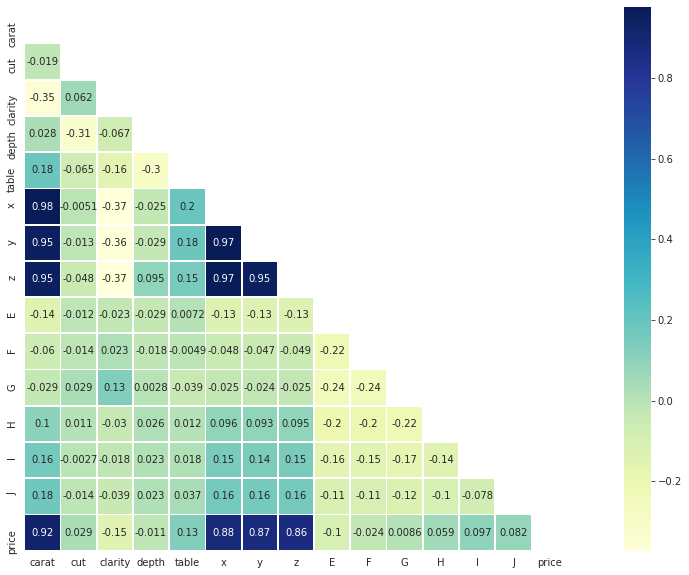

In [222]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu",annot=True)

**CHECKING FOR MULTICOLLINEARITY USING ORDINARY LEAST SQUARE METHOD**

In [223]:
import statsmodels.api as sm
results = sm.OLS(endog=Y, exog = X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          7.930e+04
Date:                Wed, 19 May 2021   Prob (F-statistic):                        0.00
Time:                        11:16:27   Log-Likelihood:                     -4.5923e+05
No. Observations:               53940   AIC:                                  9.185e+05
Df Residuals:                   53926   BIC:                                  9.186e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**PERFORMING LINEAR REGRESSION**

In [224]:
X = dataset.iloc[:, 0:1].values

In [225]:
X.shape

(53940, 1)

In [226]:
Y

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [228]:
from sklearn.linear_model import LinearRegression 
#from sklearn.model_selection import cross_val_score
regressor = LinearRegression()
#mse=cross_val_score(regressor,X,Y,cv=5)
#mean_mse=np.mean(mse)
#print(mean_mse)
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
Y_pred= regressor.predict(X_test)

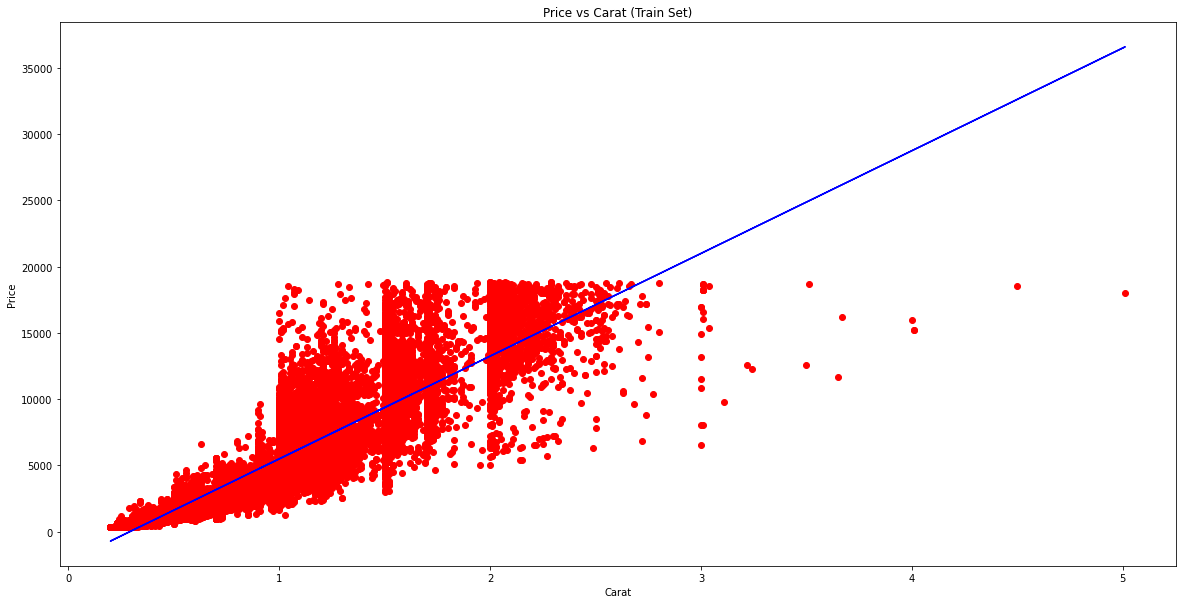

In [230]:
plt.figure(figsize=((20, 10)))
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price vs Carat (Train Set)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

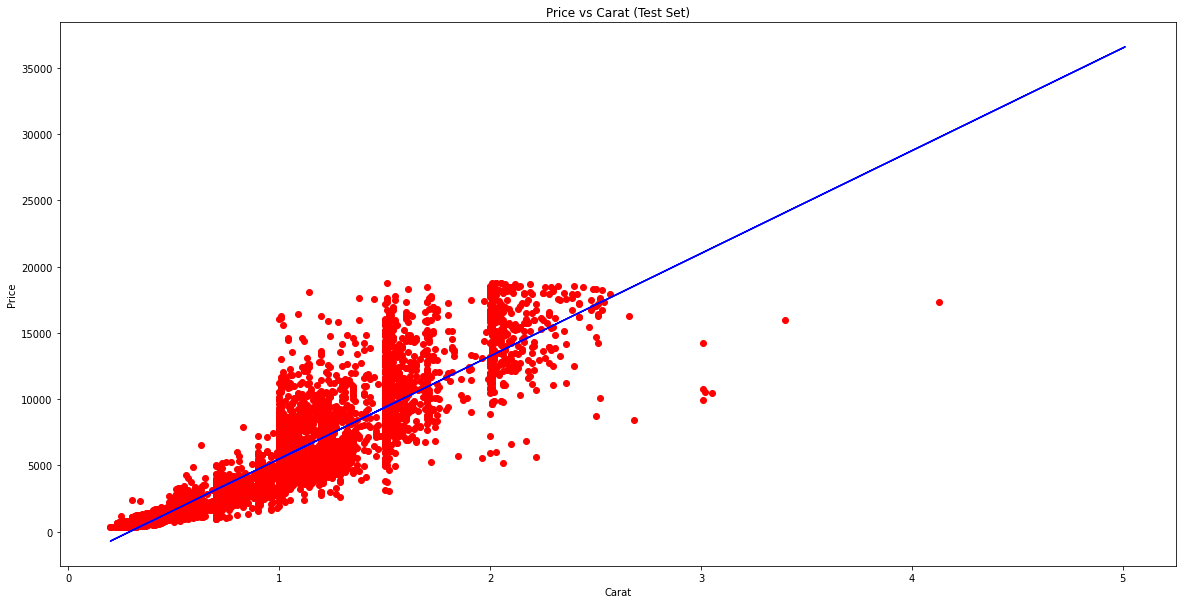

In [231]:
plt.figure(figsize=((20, 10)))
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price vs Carat (Test Set)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [232]:
from sklearn.metrics import r2_score
Linear_r2_score = r2_score(Y_test,Y_pred)

**MULTIPLE LINEAR REGRESSION**

In [233]:
X = dataset.iloc[:, :-1].values

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [235]:
from sklearn.linear_model import LinearRegression 
#from sklearn.model_selection import cross_val_score
regressor = LinearRegression()
#mse=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
#mean_mse=np.mean(mse)
#print(mean_mse)
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
Y_pred= regressor.predict(X_test)

In [237]:
from sklearn.metrics import r2_score
Multilinear_r2_score =r2_score(Y_test,Y_pred)

**RIDGE REGRESSION**

In [238]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [239]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-2553693.220290848


In [240]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34090756884.49147, tolerance: 84092033.3330649
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30273420990.878902, tolerance: 74017487.42602679
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11693300055.279943, tolerance: 23727266.327994194
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3479005472

{'alpha': 1e-15}
-2553693.22058279


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38690614079.77216, tolerance: 85847313.5517395
  positive)


In [241]:
Y_pred = ridge_regressor.predict(X_test)
Y_pred

array([5144.29166192, 7281.93367006, 6081.9493608 , ..., 5462.60193604,
       7326.20003507, 2268.31207872])

In [242]:
Y_test

array([4733, 6424, 5510, ..., 3847, 8168, 1917])

In [243]:
from sklearn.metrics import r2_score
Ridge_r2_score =r2_score(Y_test,Y_pred)

In [244]:
Y_pred = lasso_regressor.predict(X_test)
Y_pred

array([5144.29166192, 7281.93367006, 6081.9493608 , ..., 5462.60193604,
       7326.20003507, 2268.31207872])

In [245]:
Y_test

array([4733, 6424, 5510, ..., 3847, 8168, 1917])

In [246]:
from sklearn.metrics import r2_score
Lasso_r2_score =r2_score(Y_test,Y_pred)

**POLYNOMIAL REGRESSION**

In [247]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_train_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
X_test_poly = poly_reg.fit_transform(X_test)
Y_pred = regressor.predict(X_test_poly)
Y_pred

array([4844.03348547, 7065.95033365, 5149.50520426, ..., 4347.63989836,
       7973.45687252, 1465.91339213])

In [249]:
Y_test

array([4733, 6424, 5510, ..., 3847, 8168, 1917])

In [250]:
Poly_r2_score =r2_score(Y_test,Y_pred)

**SUPPORT VECTOR REGRESSION**

In [251]:
Y = dataset.iloc[:, 14:15].values

In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state =0)

In [253]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train[:,0:8]  = sc_X.fit_transform(X_train[:,0:8])
X_test[:,0:8] = sc_X.transform(X_test[:,0:8])
Y_train = sc_Y.fit_transform(Y_train)

In [254]:
from sklearn.svm import SVR
regressor = SVR(kernel ='rbf')
regressor.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [255]:
Y_pred = sc_Y.inverse_transform(regressor.predict(X_test))

In [256]:
Y_pred

array([4781.1101169 , 6965.78218491, 5137.74811625, ..., 4422.13220272,
       8002.4214162 , 1515.61636932])

In [257]:
Y_test = Y_test.reshape(len(Y_test),)

In [258]:
Y_test

array([4733, 6424, 5510, ..., 3847, 8168, 1917])

In [259]:
SVR_r2_score =r2_score(Y_test,Y_pred)

**DECISION TREE**

In [260]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state =0)

In [262]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [263]:
Y_pred = regressor.predict(X_test)

In [264]:
Y_pred

array([4620., 6635., 5368., ..., 4028., 8042., 2185.])

In [265]:
Y_test

array([4733, 6424, 5510, ..., 3847, 8168, 1917])

In [266]:
Decision_r2_score = r2_score(Y_test,Y_pred)

**RANDOM FOREST REGRESSION**

In [267]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 50, random_state=0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [268]:
Y_pred = regressor.predict(X_test)

In [269]:
Y_pred

array([4628.02, 7183.52, 5168.14, ..., 4389.36, 8579.68, 2233.22])

In [270]:
Y_test

array([4733, 6424, 5510, ..., 3847, 8168, 1917])

In [271]:
Random_r2_score = r2_score(Y_test, Y_pred)

In [272]:
print("Linear Regression model r2 score : {}".format(Linear_r2_score))
print("Multi Linear Regression model r2 score : {}".format(Multilinear_r2_score))
print("Ridge Regression model r2 score : {}".format(Ridge_r2_score))
print("Lasso Regression model r2 score : {}".format(Lasso_r2_score))
print("Polynomial Regression model r2 score : {}".format(Poly_r2_score))
print("SVR Regression model r2 score : {}".format(SVR_r2_score))
print("Decision Tree Regression model r2 score : {}".format(Decision_r2_score))
print("Random Forest Regression model r2 score : {}".format(Random_r2_score))

Linear Regression model r2 score : 0.8515758113126248
Multi Linear Regression model r2 score : 0.9111980982402156
Ridge Regression model r2 score : 0.9113085046750924
Lasso Regression model r2 score : 0.9113085046750924
Polynomial Regression model r2 score : -88.32053384146944
SVR Regression model r2 score : 0.9757378458410818
Decision Tree Regression model r2 score : 0.9652706803533649
Random Forest Regression model r2 score : 0.9803334471591209
